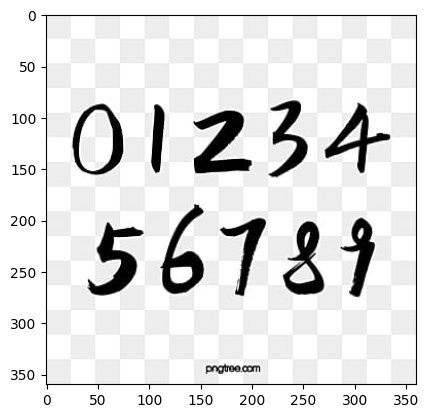

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image
def load_and_preprocess_digit_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))  # Load as grayscale
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

image_path = "/content/num.jpg"  # Path to your image
input_image = load_and_preprocess_digit_image(image_path)
plt.imshow(image.load_img(image_path))

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# 3. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 4. Train the model

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8879 - loss: 0.3995 - val_accuracy: 0.9722 - val_loss: 0.0953
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9763 - loss: 0.0828 - val_accuracy: 0.9780 - val_loss: 0.0663
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9825 - loss: 0.0588 - val_accuracy: 0.9818 - val_loss: 0.0577
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9860 - loss: 0.0477 - val_accuracy: 0.9821 - val_loss: 0.0543
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9887 - loss: 0.0372 - val_accuracy: 0.9837 - val_loss: 0.0516


In [ ]:
def load_and_preprocess_digit_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
image_path = "/content/digit_image.png"  # Replace with your image path
input_image = load_and_preprocess_digit_image(image_path)

In [ ]:
prediction = model.predict(input_image)
predicted_digit = np.argmax(prediction)

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted digit: 6


2nd Code


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# Sentiment Analysis

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


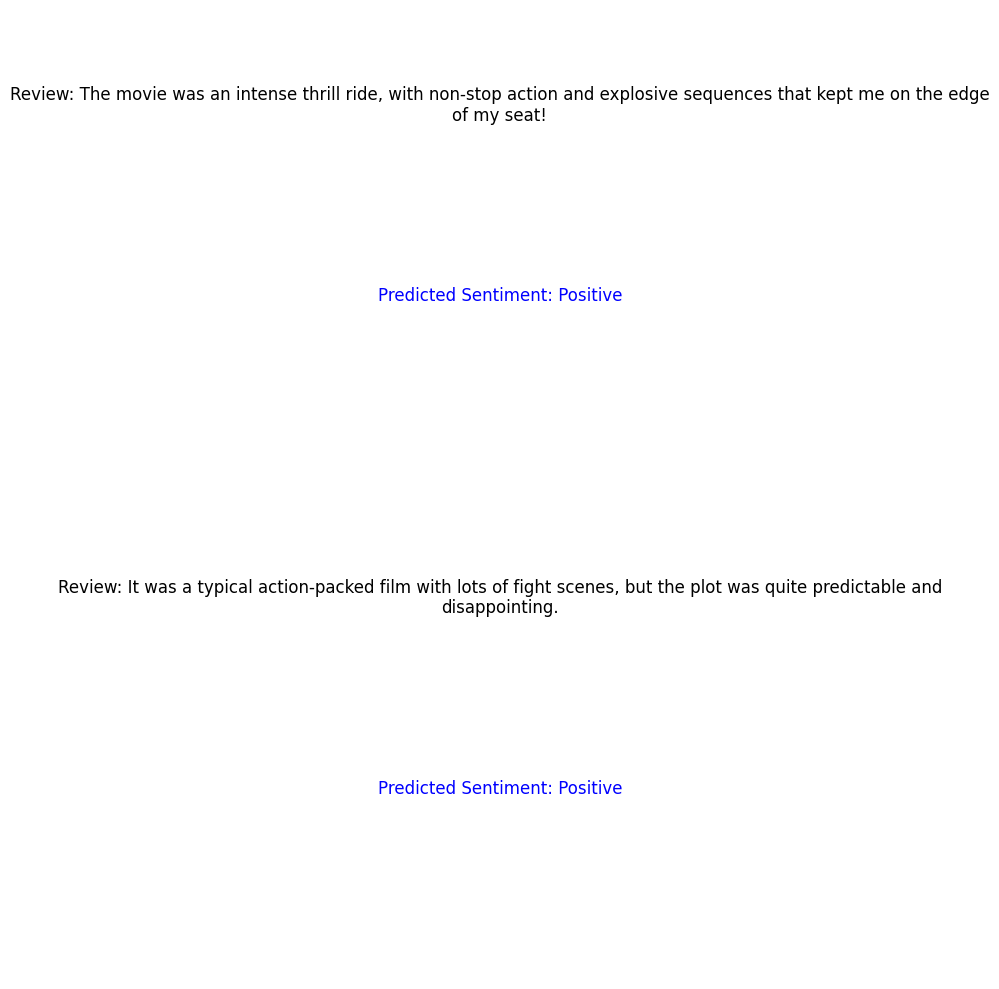

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
maxlen = 200
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = models.Sequential()
model.add(layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(layers.LSTM(128))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

def generate_fake_review(prompt):
    """Generate a fake movie review based on the given prompt"""
    reviews = {
        "action": [
            "The movie was an intense thrill ride, with non-stop action and explosive sequences that kept me on the edge of my seat!",
            "It was a typical action-packed film with lots of fight scenes, but the plot was quite predictable and disappointing."
        ],
        "romantic": [
            "A beautiful love story that made me cry! The chemistry between the leads was amazing, and the plot was heartfelt.",
            "The romance felt forced, and the characters lacked depth. Not a fan of how it ended, really disappointed."
        ],
        "comedy": [
            "A hilarious film with lots of laughs. I loved the witty dialogue and the timing of the jokes was perfect!",
            "The comedy felt very flat and predictable. I didn't find myself laughing at all, just waiting for it to end."
        ]
    }

    return reviews.get(prompt.lower(), ["The movie was great!", "I didn't enjoy the movie much."])


def predict_sentiment(review):
    """Predict if a review is positive or negative"""

    tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000)
    tokenizer.fit_on_texts([review])
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen)

    prediction = model.predict(padded_sequence)
    return 'Positive' if prediction[0] > 0.5 else 'Negative'

prompt = "action"
generated_reviews = generate_fake_review(prompt)


fig, ax = plt.subplots(len(generated_reviews), 1, figsize=(10, 5 * len(generated_reviews)))

for i, review in enumerate(generated_reviews):
    sentiment = predict_sentiment(review)

    ax[i].text(0.5, 0.8, f"Review: {review}", ha='center', va='center', fontsize=12, wrap=True)
    ax[i].text(0.5, 0.4, f"Predicted Sentiment: {sentiment}", ha='center', va='center', fontsize=12, color='blue')

    ax[i].axis('off')

plt.tight_layout()
plt.show()